# Terremotos y placas tectónicas
## Setup

Corre la siguiente celda para la actividad de hoy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from cartopy import config
import cartopy.crs as ccrs

## Cargar el catálogo de terromotos globales

Cargue el archivo de datos .csv (valores separados por comas) de todos los terremotos de magnitud 4 y superior entre 2000 - 2012 en el Catálogo ANSS (Advanced National Seismic System) o "ComCat".

Catálogo completo de ANSS (ComCat) https://www.ncedc.org/ncedc/catalog-search.html

Este conjunto de datos tiene las siguientes columnas:

Fecha y hora, latitud, longitud, profundidad, magnitud, MagType, NbStations, Gap, distancia, RMS, fuente, EventID

Importémoslo usando la función pandas ``pd.read_csv``. Podemos ver las primeras 5 filas del marco de datos usando la función ``.head()``.

In [2]:
EQ_data = pd.read_csv('data/ANSS_2000_2012_final.csv',header=7)
EQ_data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2000/01/01 01:19:26.99,41.927,20.543,10.0,4.8,ML,187,NaN,NaN,1.14,NEI,2.000010e+11
1,2000/01/01 02:12:13.45,-11.348,164.568,33.0,4.3,Mb,9,NaN,NaN,1.16,NEI,2.000010e+11
2,2000/01/01 04:30:10.37,-26.012,-68.803,105.0,4.5,Mb,44,NaN,NaN,0.91,NEI,2.000010e+11
3,2000/01/01 05:24:35.29,36.874,69.947,54.3,5.1,Mw,181,NaN,NaN,0.83,NEI,2.000010e+11
4,2000/01/01 05:58:19.78,-60.722,153.670,10.0,6.0,Mw,87,NaN,NaN,1.05,NEI,2.000010e+11


Recuerde de la tarea que se puede acceder a las columnas de marcos de datos de Pandas usando notación entre corchetes con el nombre de la columna como una cadena:

In [3]:
EQ_data['Magnitude']

0         4.8
1         4.3
2         4.5
3         5.1
4         6.0
         ... 
159016    4.0
159017    4.5
159018    4.4
159019    5.2
159020    4.6
Name: Magnitude, Length: 159021, dtype: float64

## El terremoto de mayor magnitud en el catálogo

¿Cuál es el terremoto de mayor magnitud de nuestro catálogo?

Utilice la función ``np.max()`` en la columna ``EQ_data['Magnitude']`` para responder esta pregunta en el bloque de código a continuación.

In [5]:
np.max(EQ_data['Magnitude'])

9.1

Escribe la magnitud en esta celda: 9.1

## Determinar cuándo y dónde ocurrió el terremoto de mayor magnitud

Para determinar cuándo ocurrió este terremoto, necesitamos encontrar los datos asociados con este evento según su magnitud. Pandas tiene funciones de filtrado muy buenas que nos ayudarán a resolver esto.

Defina una variable ``largest_magnitude`` que guarde el valor de la mayor magnitud y luego ejecute la celda de abajo para obtener la fecha y la hora.

In [6]:
largest_magnitude = 9.1

In [7]:
largest_eq_date = EQ_data['DateTime'][EQ_data['Magnitude'] == largest_magnitude]
print(largest_eq_date)

133404    2011/03/11 05:46:24.12
Name: DateTime, dtype: object


Para determinar dónde ocurrió el terremoto, podemos usar un filtro similar. Reemplace xxx con una declaración condicional para obtener la latitud y la longitud. (Hint, mire la declaración condicional de la celda anterior).

In [12]:
largest_eq_lon = EQ_data['Longitude'][EQ_data['Magnitude'] == largest_magnitude]
largest_eq_lat = EQ_data['Latitude'][EQ_data['Magnitude'] == largest_magnitude]

#print(float(largest_eq_lon),float(largest_eq_lat))

142.373 38.297


Póngamos un cuadrado rojo en la ubicación del terremoto más grande de nuestro catálogo. A la función plt.scatter, agregue ``s = 100`` para ajustar el tamaño del marcador. Agregue ``color = 'red'`` para cambiar el color. Agregar ``marker='s'`` para convertir el marcardor en un cuadrado.


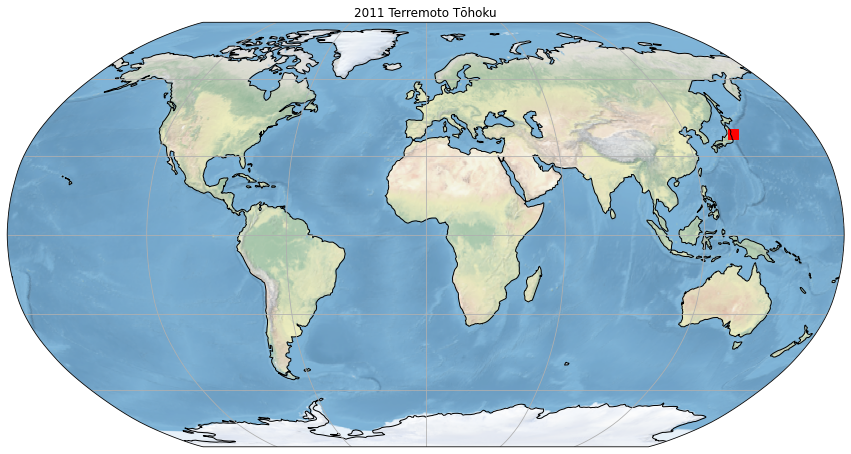

In [13]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()

plt.scatter(largest_eq_lon,largest_eq_lat,transform=ccrs.PlateCarree(),s=100,color="red",marker="s")

plt.title('2011 Terremoto Tōhoku')    
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

## Histograma de Magnitudes

¿Con qué frecuencia ocurren los grandes terremotos? Para comenzar a abordar esta pregunta, creemos un histograma de magnitudes de terremotos. 


Ya aprendimos a hacer un histograma antes la semana pasada, así que siga adelante y escriba el código para hacer uno en la celda de abajo usando los datos de ``EQ_data['Magnitude']``.

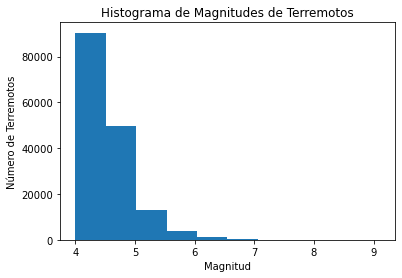

In [15]:
plt.hist( EQ_data['Magnitude'] ,bins=10,label='')
plt.xlabel('Magnitud')
plt.ylabel('Número de Terremotos')
plt.title('Histograma de Magnitudes de Terremotos')
plt.show()

Hay tantos pequeños terremotos que ni siquiera podemos ver la barra donde se encuentra el terremoto de Tohoku. Hagamos el histograma en una escala logarítmica. Para cualquier función, podemos poner un signo de interrogación después de ella para obtener su docstring. Hagamos esto para ``plt.hist``. Una vez que ejecute la celda a continuación, verá que hay muchas opciones (que también puede ver aquí: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Una de las opciones es hacer que la gráfica esté en una escala logarítmica configurando ``log = True``.

In [16]:
plt.hist?

Signature:
plt.hist(
    x,
    bins=None,
    range=None,
    density=False,
    weights=None,
    cumulative=False,
    bottom=None,
    histtype='bar',
    align='mid',
    orientation='vertical',
    rwidth=None,
    log=False,
    color=None,
    label=None,
    stacked=False,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot a histogram.

Compute and draw the histogram of *x*.  The return value is a tuple
(*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
*patches1*, ...]) if the input contains multiple data.  See the
documentation of the *weights* parameter to draw a histogram of
already-binned data.

Multiple data can be provided via *x* as a list of datasets
of potentially different length ([*x0*, *x1*, ...]), or as
a 2-D ndarray in which each column is a dataset.  Note that
the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The *bins*, *range*, *weights*, and *density* parameters behave as in
`numpy.histogram`.



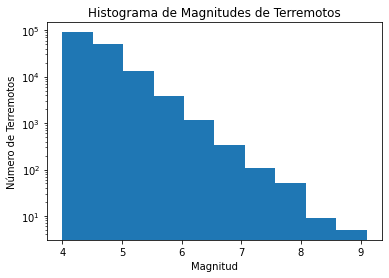

In [17]:
plt.hist( EQ_data['Magnitude'] ,bins=10,label='',log = True)
plt.xlabel('Magnitud')
plt.ylabel('Número de Terremotos')
plt.title('Histograma de Magnitudes de Terremotos')
plt.show()

Ahora hagamos el histograma de profundidades de terremotos. Veamos el rango y la frecuencia de las profundidades donde ocurren los terremotos. Haz un histograma de la profundidad del terremoto.

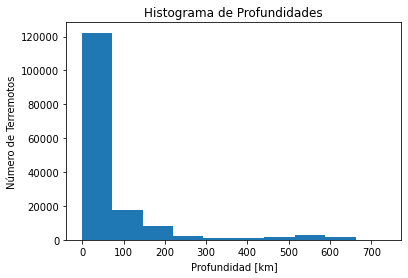

In [19]:
plt.hist(EQ_data['Depth'],bins=10,label='Profundidad')
plt.xlabel('Profundidad [km]')
plt.ylabel('Número de Terremotos')
plt.title('Histograma de Profundidades')
plt.show()

## Mapa de los epicentros de los terremoto
Ahora tracemos los epicentros de los terremotos en una proyección de Robinson. Reemplace los xxx con longitud y latitud para hacer el mapa.

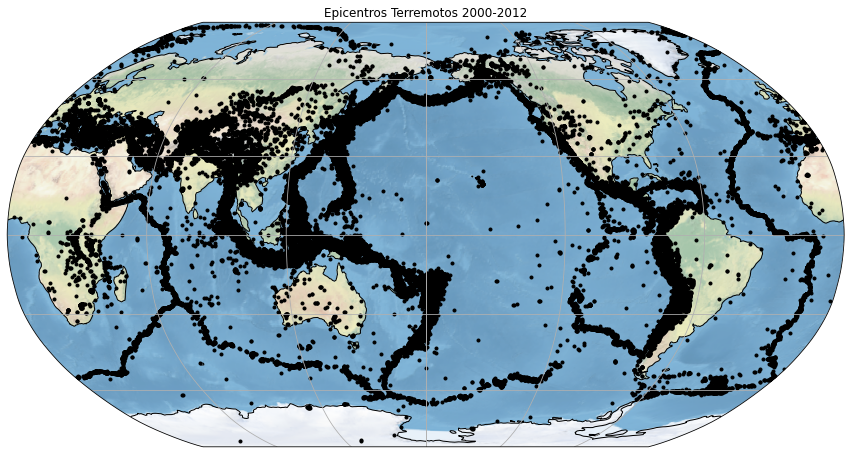

In [20]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
ax.set_global()

plt.scatter(EQ_data['Longitude'],EQ_data['Latitude'],marker='.',color='black',transform=ccrs.PlateCarree())

plt.title('Epicentros Terremotos 2000-2012')
ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()

## Mapas de profundidad del terremoto

El mapa que hicimos arriba es interesante, pero no nos dice todo sobre nuestros datos, como la profundidad de los terremotos. Separemos por colores los terremotos en el gráfico de acuerdo a su profunidad.

Para hacer esto, use la misma función ``plt.scatter()``, pero agregue la opción para establecer el color por profundidad. Puede hacer esto teniendo ``c = EQ_data['Depth']`` dentro de la función. Puede personalizar la salida configurando el valor mínimo para la barra de color ``vmin = 0`` y el valor máximo ``vmax = 200``. También puede personalizar el mapa de colores. Un mapa de color perceptualmente uniforme como ``cmap = 'magma_r'`` funciona bien (https://matplotlib.org/tutorials/colors/colormaps.html). Creo que también es bueno hacer que los puntos se vean parcialmente estableciendo ``alpha = 0.5``. Todas estas consideraciones se pueden realizar agregando estos argumentos dentro de la función ``plt.scatter()``.

Haga un mapa que coloree los puntos por profundidad insertando estos argumentos en la función ``plt.scatter()`` en el bloque de código a continuación.

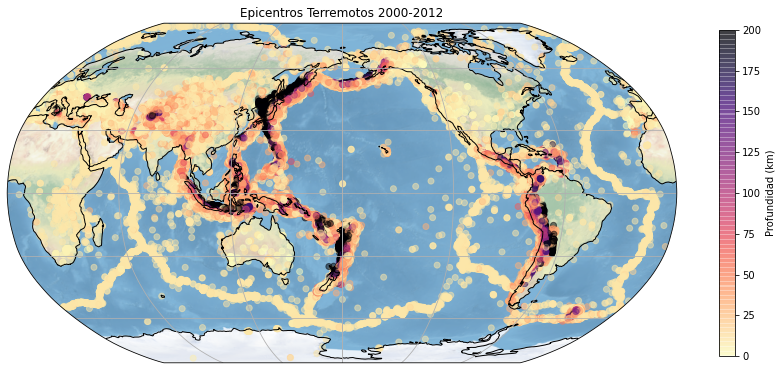

In [23]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-180))
ax.set_global()

plt.scatter(EQ_data['Longitude'],EQ_data['Latitude'],c = EQ_data['Depth'],
            transform=ccrs.PlateCarree(), vmin = 0, vmax = 200, cmap = 'magma_r',alpha = 0.5)

plt.title('Epicentros Terremotos 2000-2012')
ax.coastlines()
ax.stock_img()
ax.gridlines()
plt.colorbar(shrink=0.4,label='Profundidad (km)',)
plt.show()

¿Cual es la profundidad de los terremotos que ocurren en las dorsales oceánicas?

Entre 0 y 25 [km].

Los terremotos en las fosas (como alrededor del 'anillo de fuego' en el océano Pacífico) se hacen más profundos de manera sistemática a medida que subductan en la placa continental. ¿Puede ubicar zonas de subducción a partir de los terremotos?

Se puede inferir que existe subducción a partir de las zonas en donde se generarn terremotos de mayor profundidad. En particular, en las costas del oceano Pacifico de América del Sur, Japón, Rusia y Oceanía.

## La subducción de los Andes

Veamos un subconjunto de este catálogo de terremotos en los Andes en América del Sur. El siguiente código está filtrando el marco de datos para incluir solo aquellos entre 20ºS y 26ºS de latitud y 75ºW y 60ºW de longitud.

In [24]:
selected_quakes = EQ_data[(EQ_data['Latitude']>-26)&(EQ_data['Latitude']<-20)
                          &(EQ_data['Longitude']> -75)&(EQ_data['Longitude']< -60)]

Muestre los terremotos y sus profundidades como ya lo hizo anteriormente

/Applications/Utilities/anaconda3/lib/python3.8/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


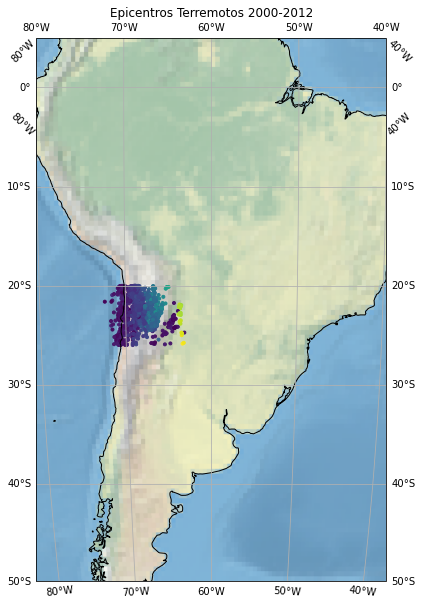

In [27]:
plt.figure(1,(10,10)) # make a big figure 
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_extent([-80, -40, -50, 5], crs=ccrs.PlateCarree())

plt.scatter(selected_quakes['Longitude'],selected_quakes['Latitude'],marker='.',c=selected_quakes['Depth'],transform=ccrs.PlateCarree())


plt.title('Epicentros Terremotos 2000-2012')
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

plt.show()

Tomemos todos los terremotos dentro de esa región y grafiquemos la profundidad del terremoto en el eje y y la ubicación (longitud) del terremoto en el eje x. ¡Etiquetar ejes es muy importante en la ciencia! ¡No haga gráficos sin ejes etiquetados!

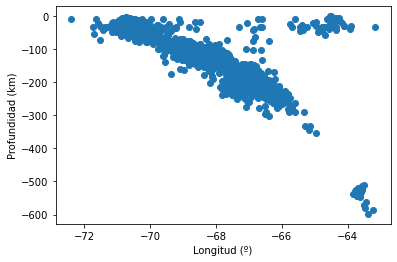

In [28]:
plt.scatter(selected_quakes['Longitude'],-selected_quakes['Depth'])
plt.xlabel('Longitud (º)')
plt.ylabel('Profundidad (km)')
plt.show()

¿Cómo describiría la distribución de sismos? ¿Podría separarlos en grupos acorde al lugar en el que ocurren?

Se observa un arco que sigue en profundidad al borde entre placas tectónicas, además de una recta de terremotos cerca de la superficie.

Todo el grupo de terremotos descrito por el arco que atraviesa el plano pueden asociarse a terremotos prodicidos por la subducción de placas tectonicas, entre las placas de Nazca y Sudamericana. 

Por otro lado, todos los terremotos que existen entre las alturas de 0 y -100 [km], son superficiales y no están asociados a la subducción de placas.

## La subducción chilena [Opcional, sólo si están muy motivados por saber que pasa en Chile]

Sigamos viendo que pasa si filtamos entre otros sectores en Chile. 

In [29]:
selected_quakes = EQ_data[(EQ_data['Latitude']>-32)&(EQ_data['Latitude']<-26)
                          &(EQ_data['Longitude']> -75)&(EQ_data['Longitude']< -60)]

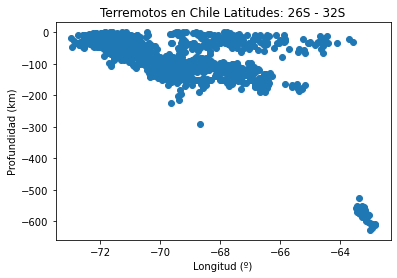

In [30]:
plt.scatter(selected_quakes['Longitude'],-selected_quakes['Depth'])
plt.xlabel('Longitud (º)')
plt.ylabel('Profundidad (km)')
plt.title('Terremotos en Chile Latitudes: 26S - 32S')

plt.show()

In [31]:
selected_quakes = EQ_data[(EQ_data['Latitude']>-37)&(EQ_data['Latitude']<-33)
                          &(EQ_data['Longitude']> -75)&(EQ_data['Longitude']< -60)]

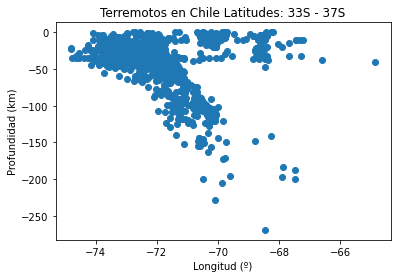

In [32]:
plt.scatter(selected_quakes['Longitude'],-selected_quakes['Depth'])
plt.xlabel('Longitud (º)')
plt.ylabel('Profundidad (km)')
plt.title('Terremotos en Chile Latitudes: 33S - 37S')
plt.show()

¿Cómo se comparan estos perfiles? ¿Cómo cambia el ángulo de caída del 'slab'?  Mire este mapa de actividad volcánica en Chile: https://www.researchgate.net/figure/Map-of-active-volcanoes-in-mainland-Chile_fig3_331487842 . ¿Cómo se relacionan los gráficos anteriores con ese mapa?.

*Escriba su respuesta aquí*